In [2]:
import time
import numpy as np

import os
import sys

sys.path.append(os.path.join(os.getcwd(), "utils"))
from video_utils import *

import cv2

from scipy.stats import mode

import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
input_dir = './data/videos'

video_paths = get_videos(input_dir)
print("Discover {} videos in {}".format(len(video_paths), input_dir))

vid_pth = video_paths[0]

Discover 2 videos in ./data/videos


In [4]:
def get_video_background(video_path):
    vid_cap = cv2.VideoCapture(video_path)
    num_frms, original_fps = int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT)), vid_cap.get(cv2.CAP_PROP_FPS)

    vid_cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    _, img = vid_cap.read()
    height, width, layers = img.shape
    size = (width,height)
    
    extracted_frames = []
    frames_to_look = range(0, 
                           200, 
                           5)    
    for frame_id in tqdm(frames_to_look):  
        vid_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        _, frame = vid_cap.read()
        
        extracted_frames.append(frame)
        
    vid_cap.release()
    
    sequence = np.stack(extracted_frames, axis=3)

    result = np.median(sequence, axis=3).astype(np.uint8)
    
    return result

background_img = get_video_background(vid_pth)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 40.01it/s]


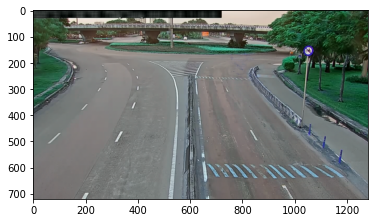

In [5]:
plt.imshow(background_img)
plt.show()

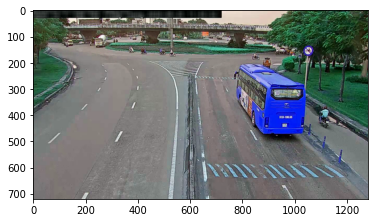

In [6]:
vid_cap = cv2.VideoCapture(vid_pth)

vid_cap.set(cv2.CAP_PROP_POS_FRAMES, 110)
_, img = vid_cap.read()

vid_cap.release()

plt.imshow(img)
plt.show()

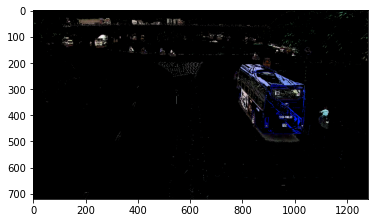

In [7]:
img_remove_bg = img * np.stack((np.abs(np.mean(img,2) - np.mean(background_img,2)) / 256.0 >= 0.2,)*3, axis=-1)

plt.imshow(img_remove_bg)
plt.show()

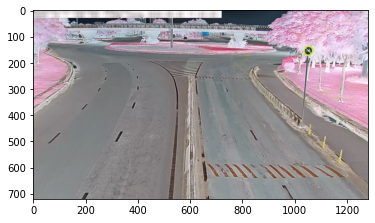

In [8]:
invert_bg = cv2.bitwise_not(background_img)

plt.imshow(invert_bg)
plt.show()

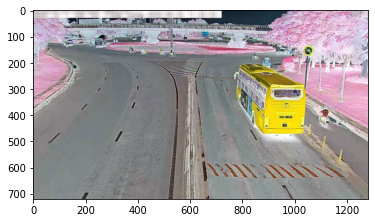

In [9]:
invert_img = cv2.bitwise_not(img)

plt.imshow(invert_img)
plt.show()

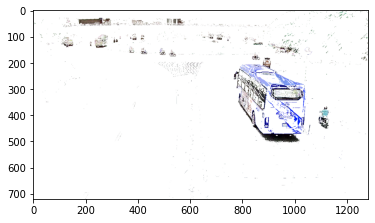

In [10]:
invert_img_remove_bg = invert_img * np.stack((np.abs(np.mean(invert_img,2) - np.mean(invert_bg,2)) / 256.0 >= 0.2,)*3, axis=-1)
invert_img_remove_bg = cv2.bitwise_not(invert_img_remove_bg)
plt.imshow(invert_img_remove_bg)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.16it/s]


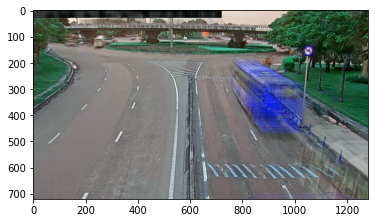

In [24]:
def get_video_transition(video_path):
    vid_cap = cv2.VideoCapture(video_path)
    num_frms, original_fps = int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT)), vid_cap.get(cv2.CAP_PROP_FPS)

    vid_cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    _, img = vid_cap.read()
    height, width, layers = img.shape
    size = (width,height)
    
    extracted_frames = []
    frames_to_look = range(110, 
                           121, 
                           2)    
    for frame_id in tqdm(frames_to_look):  
        vid_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        _, frame = vid_cap.read()
        
        extracted_frames.append(frame)
        
    vid_cap.release()
    
    sequence = np.stack(extracted_frames, axis=3)

    result = np.mean(sequence, axis=3).astype(np.uint8)
    
    return result

img_transition = get_video_transition(vid_pth)
plt.imshow(img_transition)
plt.show()